# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

HTTP_STATUS_OK = 200
HTTP_STATUS_NOT_FOUND = 401

# Output File (CSV)
output_data_file = "output_data/cities.csv"

BASE_URL = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# print(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
city_name = []
country = []
lattitude =[]
longitude = []
date = []
temperature = []
wind_speed = []
cloud_cover = []
humidity = []

counter = 1

for city in cities:  
    current_url = f"{BASE_URL}&q={city}"
    response = requests.get(current_url) 
    if response.status_code == HTTP_STATUS_OK:
        json = response.json()
        city_name.append(json["name"])
        country.append(json["sys"]["country"])
        lattitude.append(json["coord"]["lat"])
        longitude.append(json["coord"]["lon"])
        date.append(json["dt"])
        temperature.append(json["main"]["temp_max"])
        wind_speed.append(json["wind"]["speed"])
        cloud_cover.append(json["clouds"]["all"])
        humidity.append(json["main"]["humidity"])

        print(f"city  {counter} | {city}")        
        counter = counter + 1
        time.sleep(1.05)
    else:
        print(f"The city of {city} Not Found")

city  1 | kapaa
city  2 | pisco
city  3 | tuktoyaktuk
city  4 | grand gaube
city  5 | atuona
city  6 | leningradskiy
The city of meyungs Not Found
city  7 | touros
city  8 | cabo san lucas
city  9 | dikson
city  10 | geraldton
city  11 | puerto ayora
The city of sentyabrskiy Not Found
city  12 | mataura
city  13 | east london
The city of halalo Not Found
city  14 | qaanaaq
city  15 | kodiak
city  16 | upernavik
city  17 | saint anthony
city  18 | cherskiy
city  19 | ust-nera
city  20 | nichinan
city  21 | khatanga
city  22 | molochnoye
city  23 | buin
city  24 | bluff
city  25 | tilichiki
city  26 | kavieng
city  27 | cidreira
city  28 | algodones
city  29 | jeremie
city  30 | port alfred
city  31 | labuhan
city  32 | busselton
city  33 | albany
city  34 | rikitea
The city of illoqqortoormiut Not Found
The city of opobo Not Found
city  35 | hamilton
city  36 | college
city  37 | bathsheba
city  38 | hilo
city  39 | yauco
city  40 | podosinovets
city  41 | vaini
city  42 | punta arenas


city  341 | matay
city  342 | kieta
city  343 | coquimbo
city  344 | amapa
city  345 | ayan
city  346 | mackay
city  347 | ila
city  348 | magan
city  349 | yagodnoye
city  350 | kohima
city  351 | sao filipe
city  352 | big bend
city  353 | coachella
city  354 | maputo
city  355 | concordia
city  356 | narsaq
city  357 | sao joao da barra
city  358 | ludvika
city  359 | sinegorye
city  360 | conceicao do araguaia
city  361 | asau
city  362 | tayshet
city  363 | gudermes
city  364 | lamar
city  365 | tatvan
city  366 | thinadhoo
city  367 | axim
city  368 | odweyne
city  369 | doha
city  370 | hella
city  371 | porto santo
city  372 | dakar
city  373 | klaksvik
city  374 | swan hill
city  375 | oistins
city  376 | igunga
The city of attawapiskat Not Found
city  377 | kheralu
city  378 | sainte-anne-des-monts
city  379 | inta
city  380 | mabini
The city of umzimvubu Not Found
city  381 | gotsu
city  382 | asyut
city  383 | henniker
city  384 | samdrup jongkhar
city  385 | tongren
city  

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_data = {'City': city_name, 'Country': country, 'Lat': lattitude,
                'Long': longitude, 'Date': date, 'Temp': temperature,
                'Wind Spd': wind_speed, 'Cloud Cvr': cloud_cover, 'Humid': humidity }
weather_data_df = pd.DataFrame(weather_data)

In [13]:
weather_data_df

,City,Country,Lat,Long,Date,Temp,Wind Spd,Cloud Cvr,Humid
0,Kapaa,US,22.0752,-159.3190,1637637507,300.14,1.34,90,76
1,Pisco,PE,-13.7000,-76.2167,1637637761,291.49,5.14,90,88
2,Tuktoyaktuk,CA,69.4541,-133.0374,1637637787,252.15,4.63,40,77
3,Grand Gaube,MU,-20.0064,57.6608,1637637763,297.80,0.45,1,66
4,Atuona,PF,-9.8000,-139.0333,1637637765,298.46,3.65,100,76
...,...,...,...,...,...,...,...,...,...
573,Malartic,CA,48.1335,-78.1328,1637638702,263.21,3.43,98,91
574,Coalinga,US,36.1397,-120.3602,1637638870,287.61,0.08,50,34
575,Vilcún,CL,-38.6500,-72.2333,1637638872,282.56,1.00,0,89
576,Kewanee,US,41.2456,-89.9248,1637638873,270.78,2.00,7,37


In [67]:
weather_data_df.to_csv("weather_data.csv")
weather_data_df

,City,Country,Lat,Long,Date,Temp,Wind Spd,Cloud Cvr,Humid
0,Kapaa,US,22.0752,-159.3190,1637637507,300.14,1.34,90,76
1,Pisco,PE,-13.7000,-76.2167,1637637761,291.49,5.14,90,88
2,Tuktoyaktuk,CA,69.4541,-133.0374,1637637787,252.15,4.63,40,77
3,Grand Gaube,MU,-20.0064,57.6608,1637637763,297.80,0.45,1,66
4,Atuona,PF,-9.8000,-139.0333,1637637765,298.46,3.65,100,76
...,...,...,...,...,...,...,...,...,...
573,Malartic,CA,48.1335,-78.1328,1637638702,263.21,3.43,98,91
574,Coalinga,US,36.1397,-120.3602,1637638870,287.61,0.08,50,34
575,Vilcún,CL,-38.6500,-72.2333,1637638872,282.56,1.00,0,89
576,Kewanee,US,41.2456,-89.9248,1637638873,270.78,2.00,7,37


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
humidity_df = weather_data_df.loc[weather_data_df["Humid"]>100]
len(humidity_df)

0

In [1]:
#  Get the indices of cities that have humidity over 100%.

# No city with Humidity > 100%

In [2]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# No city with Humidity > 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

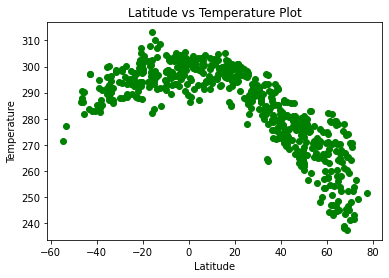

In [17]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Temp']
plt.scatter(x_values,y_values, color='green')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs Temperature Plot')
plt.show()

## Latitude vs. Humidity Plot

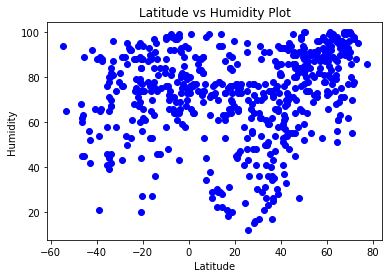

In [27]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Humid']
plt.scatter(x_values,y_values, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity Plot')
plt.show()

## Latitude vs. Cloudiness Plot

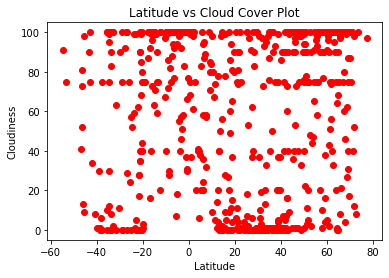

In [30]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Cloud Cvr']
plt.scatter(x_values,y_values, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloud Cover Plot')
plt.show()

## Latitude vs. Wind Speed Plot

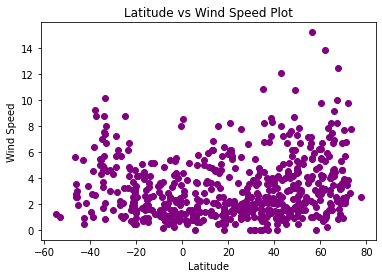

In [29]:
x_values = weather_data_df['Lat']
y_values = weather_data_df['Wind Spd']
plt.scatter(x_values,y_values, color='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed Plot')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [50]:
North_Hem_df = weather_data_df.loc[weather_data_df["Lat"]>=0]
North_Hem_df
x_values = North_Hem_df['Lat']
y_values = North_Hem_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      291.617823
2      258.708687
5      258.757864
7      291.051242
8      255.893633
          ...    
572    289.088456
573    273.517864
574    281.848695
576    278.302164
577    275.052502
Name: Lat, Length: 396, dtype: float64
y = -0.69x +306.95


r-value: 0.7531735236222282


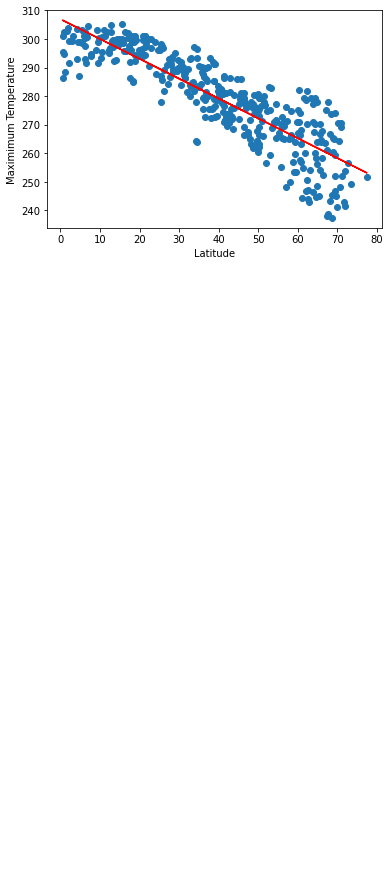

In [51]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Maximimum Temperature')

print(f"r-value: {rvalue**2}")
plt.annotate("y = -0.69x +306.95",(-5,5),fontsize=20,color="green")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [52]:
South_Hem_df = weather_data_df.loc[weather_data_df["Lat"]<=0]
South_Hem_df
x_values = South_Hem_df['Lat']
y_values = South_Hem_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

1      297.469894
3      295.639654
4      298.601750
6      299.937079
9      293.097244
          ...    
564    298.640698
567    293.068222
569    297.772274
570    295.523072
575    290.228917
Name: Lat, Length: 182, dtype: float64
y = 0.29x +301.45


The r-value is: 0.344338223836828


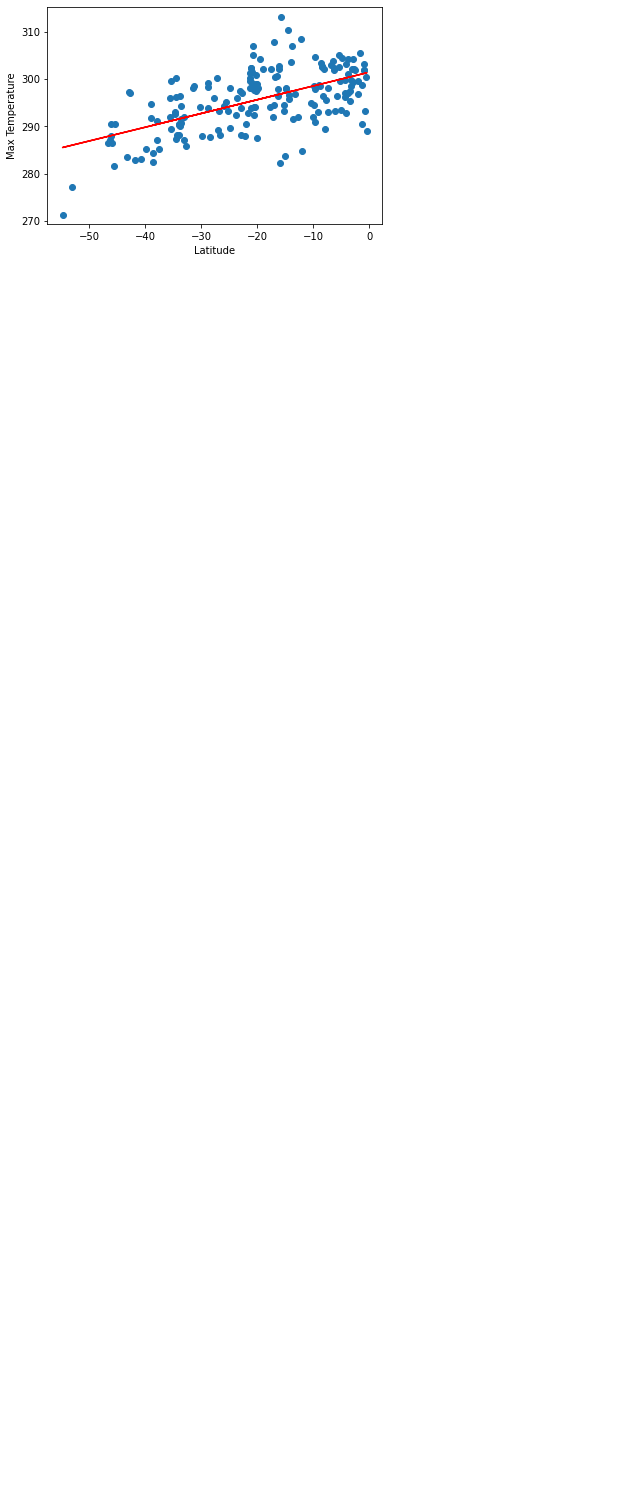

In [53]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.annotate("y = 0.29x +301.45",(-5,5),fontsize=20,color="green")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [54]:
x_values = North_Hem_df['Lat']
y_values = North_Hem_df['Humid']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      65.582718
2      83.431746
5      83.405074
7      65.890016
8      84.958555
         ...    
572    66.954578
573    75.399648
574    70.881230
576    72.804773
577    74.567301
Name: Lat, Length: 396, dtype: float64
y = 0.38x +57.27


r-value: 0.13026250209088877


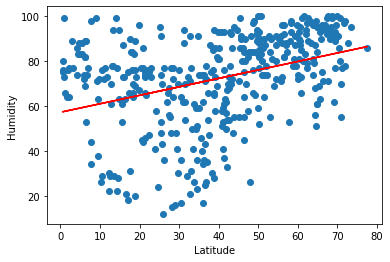

In [55]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"r-value: {rvalue**2}")
plt.annotate("y = 0.38x +57.27",(-5,5),fontsize=20,color="green")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [56]:
x_values = South_Hem_df['Lat']
y_values = South_Hem_df['Humid']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

1      75.507465
3      73.543773
4      76.721849
6      78.154543
9      70.815985
         ...    
564    76.763637
567    70.784847
569    75.831892
570    73.418692
575    67.738516
Name: Lat, Length: 182, dtype: float64
y = 0.31x +79.77


r-value: 0.05779733327226094


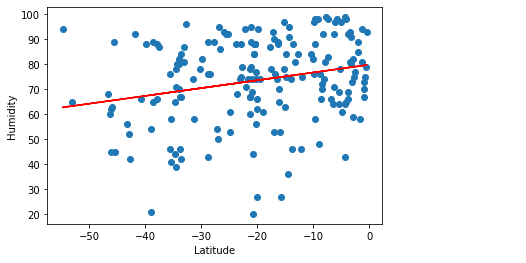

In [57]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"r-value: {rvalue**2}")
plt.annotate("y = 0.31x +79.77",(-5,5),fontsize=20,color="green")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [58]:
x_values = North_Hem_df['Lat']
y_values = North_Hem_df['Cloud Cvr']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      46.865911
2      68.624938
5      68.592423
7      47.240526
8      70.486209
         ...    
572    48.538290
573    58.833332
574    53.325112
576    55.670025
577    57.818653
Name: Lat, Length: 396, dtype: float64
y = 0.46x +36.73


r-value: 0.05093124875545503


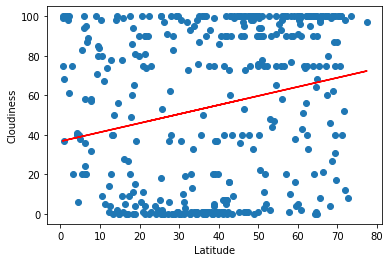

In [59]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"r-value: {rvalue**2}")
plt.annotate("y = 0.46x +36.73",(-5,5),fontsize=20,color="green")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [60]:
x_values = South_Hem_df['Lat']
y_values = South_Hem_df['Cloud Cvr']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

1      70.503574
3      64.653416
4      74.121424
6      78.389653
9      56.526889
         ...    
564    74.245916
567    56.434123
569    71.470096
570    64.280778
575    47.358606
Name: Lat, Length: 182, dtype: float64
y = 0.93x +83.21


r-value: 0.10989875647437129


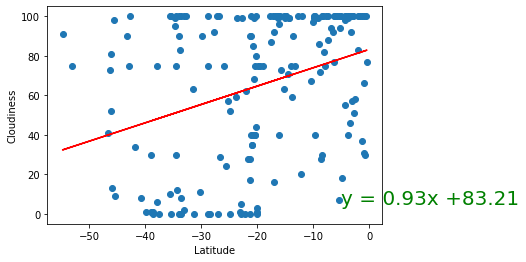

In [61]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"r-value: {rvalue**2}")
plt.annotate("y = 0.93x +83.21",(-5,5),fontsize=20,color="green")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [63]:
x_values = North_Hem_df['Lat']
y_values = North_Hem_df['Wind Spd']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

0      2.830348
2      4.182549
5      4.180528
7      2.853628
8      4.298216
         ...   
572    2.934276
573    3.574055
574    3.231750
576    3.377474
577    3.510999
Name: Lat, Length: 396, dtype: float64
y = 0.03x +2.2


r-value: 0.052513424844150586


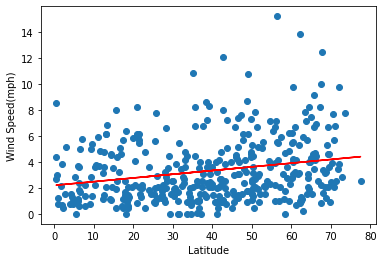

In [64]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

print(f"r-value: {rvalue**2}")
plt.annotate("y = 0.03x +2.2",(-5,5),fontsize=20,color="green")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [65]:
x_values = South_Hem_df['Lat']
y_values = South_Hem_df['Wind Spd']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

1      2.720670
3      3.031172
4      2.528650
6      2.302110
9      3.462495
         ...   
564    2.522042
567    3.467418
569    2.669371
570    3.050951
575    3.949109
Name: Lat, Length: 182, dtype: float64
y = -0.05x +2.05


r-value: 0.0994512147586255


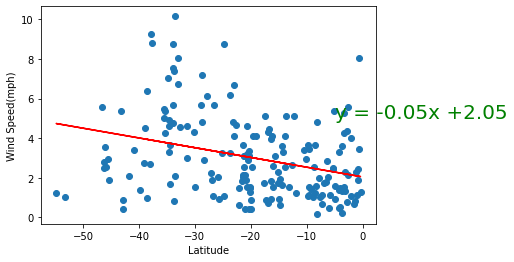

In [66]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

print(f"r-value: {rvalue**2}")
plt.annotate("y = -0.05x +2.05",(-5,5),fontsize=20,color="green")

plt.show()